In [1]:
import numpy as np
import pandas as pd
import warnings

In [3]:
warnings.filterwarnings('ignore') #if we get any warnings this method ignors that.

In [4]:
##Get the Dataset

In [13]:
columns_name=["user_id", "item_id", "rating", "timestamp"]

df=pd.read_csv('ml-100k/u.data',sep='\t',names=columns_name)

In [14]:
df.head()

user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

In [15]:
df['user_id'].nunique() #used to find unique user_ids

943

In [16]:
df['item_id'].nunique() #To find unique no.of items

1682

In [32]:
##Reading u.item
# In this data we only concerned about item_id and movie_title.

movies_titles=pd.read_csv("ml-100k/u.item",sep="\|",header=None)


In [34]:
movies_titles=movies_title[[0,1]] #Only get the item_id and title of movie

In [35]:
movies_titles.columns=['item_id','title'] #Giving column names to movies_titles

In [36]:
movies_titles.head()

item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)

In [37]:
df=pd.merge(df,movies_titles,on="item_id")  # Merging the two data frames on common column i.e. item_id

In [39]:
df.tail()

user_id  item_id  rating  timestamp  \
99995      840     1674       4  891211682   
99996      655     1640       3  888474646   
99997      655     1637       3  888984255   
99998      655     1630       3  887428735   
99999      655     1641       3  887427810   

                                                   title  
99995                                  Mamma Roma (1962)  
99996                             Eighth Day, The (1996)  
99997                                  Girls Town (1996)  
99998  Silence of the Palace, The (Saimt el Qusur) (1...  
99999                                    Dadetown (1995)

In [40]:
##Exploratory Data Analysis

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [45]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)

#Here we are grouping the title,and get the mean of the each movie
##Then after, we are sorting all the values in the descending order.

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [48]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

#Here we are getting the count the memebers who watches the each movie.

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [49]:
ratings=pd.DataFrame(df.groupby('title').mean()['rating'])

#Creating the rating dataframe

In [50]:
ratings.head()

rating
title                              
'Til There Was You (1997)  2.333333
1-900 (1994)               2.600000
101 Dalmatians (1996)      2.908257
12 Angry Men (1957)        4.344000
187 (1997)                 3.024390

In [51]:
ratings['num_of_ratings']=pd.DataFrame(df.groupby('title').count()['rating'])

#Adding num_of_ratings column to the dataframe.

In [53]:
ratings.sort_values(by='rating',ascending=False)

rating  num_of_ratings
title                                                               
They Made Me a Criminal (1939)                   5.0               1
Marlene Dietrich: Shadow and Light (1996)        5.0               1
Saint of Fort Washington, The (1993)             5.0               2
Someone Else's America (1995)                    5.0               1
Star Kid (1997)                                  5.0               3
...                                              ...             ...
Eye of Vichy, The (Oeil de Vichy, L') (1993)     1.0               1
King of New York (1990)                          1.0               1
Touki Bouki (Journey of the Hyena) (1973)        1.0               1
Bloody Child, The (1996)                         1.0               1
Crude Oasis, The (1995)                          1.0               1

[1664 rows x 2 columns]

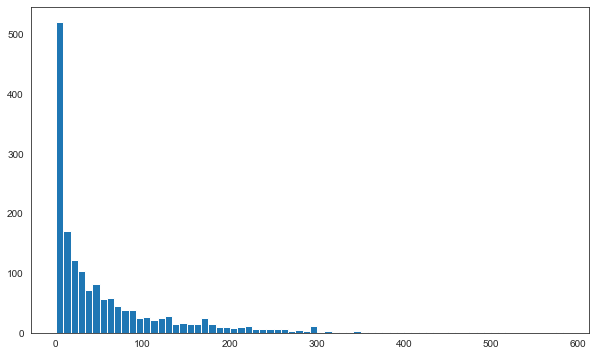

In [55]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num_of_ratings'], bins=70)
plt.show()

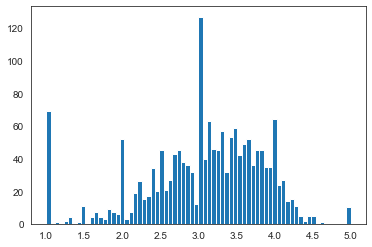

In [56]:
plt.hist(ratings['rating'],bins=70)
plt.show()

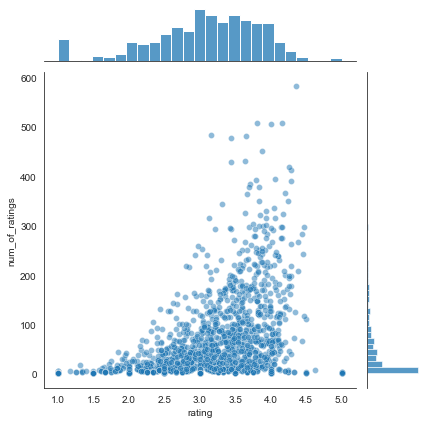

In [58]:
sns.jointplot(x='rating', y='num_of_ratings' ,data=ratings, alpha=0.5)

In [59]:
##Creating Movie recommondation

In [60]:
#Creating a matrix by using the default pivot table function in pandas.
#
moviemat=df.pivot_table(index="user_id",columns="title",values="rating")

In [61]:
moviemat

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
5                              NaN           NaN                    2.0   
...                            ...           ...                    ...   
939                            NaN           NaN                    NaN   
940                            NaN           NaN                    NaN   
941                            NaN           NaN                    NaN   
942                            NaN           NaN                    NaN   
943                            NaN           NaN                    NaN   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   
5                        NaN         NaN                          NaN   
...                      ...         ...                          ...   
939                      NaN         NaN                          NaN   
940                      NaN         NaN                          NaN   
941                      NaN         NaN                          NaN   
942                      NaN         NaN                          NaN   
943                      NaN         NaN                          2.0   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   
5                                        NaN                           4.0   
...                                      ...                           ...   
939                                      NaN                           NaN   
940                                      NaN                           NaN   
941                                      NaN                           NaN   
942                                      NaN                           3.0   
943                                      NaN                           NaN   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   
5                                                NaN                   NaN   
...                                              ...                   ...   
939                                              NaN                   NaN   
940                                              NaN                   NaN   
941                                              NaN                   NaN   
942                                              NaN                   3.0   
943                                              NaN                   NaN   

title    ...  Yankee Zulu (1994)  Year of th

In [62]:
starwars_user_ratings=moviemat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [64]:
#Correlating the above starwars_user_ratings series with the whole movie mat.
#Correlation ranges from -1.0 to +1.0
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [65]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [66]:
corr_starwars.dropna(inplace=True)

In [71]:
corr_starwars.head()

Correlation
title                                 
'Til There Was You (1997)     0.872872
1-900 (1994)                 -0.645497
101 Dalmatians (1996)         0.211132
12 Angry Men (1957)           0.184289
187 (1997)                    0.027398

In [72]:
#If I like the starwars then anyone like to suggest me a movie, then obviously 
#they suggest movie with the highest correlation.
corr_starwars.sort_values('Correlation',ascending=False).head(10)

Correlation
title                                                          
Man of the Year (1995)                                      1.0
Hollow Reed (1996)                                          1.0
Stripes (1981)                                              1.0
Beans of Egypt, Maine, The (1994)                           1.0
Old Lady Who Walked in the Sea, The (Vieille qu...          1.0
Outlaw, The (1943)                                          1.0
Line King: Al Hirschfeld, The (1996)                        1.0
Hurricane Streets (1998)                                    1.0
Good Man in Africa, A (1994)                                1.0
Safe Passage (1994)                                         1.0

In [73]:
##Filtaration, consider only movies who rated more than 100.

In [74]:
corr_starwars=corr_starwars.join(ratings['num_of_ratings'])
#Here, joining the two dataframes corr_starwars with anthoer df of ratings.
corr_starwars.head()

Correlation  num_of_ratings
title                                                 
'Til There Was You (1997)     0.872872               9
1-900 (1994)                 -0.645497               5
101 Dalmatians (1996)         0.211132             109
12 Angry Men (1957)           0.184289             125
187 (1997)                    0.027398              41

In [76]:
corr_starwars[corr_starwars['num_of_ratings']>100].sort_values('Correlation',ascending=False)

Correlation  \
title                                                             
Star Wars (1977)                                       1.000000   
Empire Strikes Back, The (1980)                        0.747981   
Return of the Jedi (1983)                              0.672556   
Raiders of the Lost Ark (1981)                         0.536117   
Austin Powers: International Man of Mystery (1997)     0.377433   
...                                                         ...   
Edge, The (1997)                                      -0.127167   
As Good As It Gets (1997)                             -0.130466   
Crash (1996)                                          -0.148507   
G.I. Jane (1997)                                      -0.176734   
First Wives Club, The (1996)                          -0.194496   

                                                    num_of_ratings  
title                                                               
Star Wars (1977)                                               583  
Empire Strikes Back, The (1980)                                367  
Return of the Jedi (1983)                                      507  
Raiders of the Lost Ark (1981)                                 420  
Austin Powers: International Man of Mystery (1997)             130  
...                                                            ...  
Edge, The (1997)                                               113  
As Good As It Gets (1997)                                      112  
Crash (1996)                                                   128  
G.I. Jane (1997)                                               175  
First Wives Club, The (1996)                                   160  

[334 rows x 2 columns]

In [77]:
##Prediction Function

In [80]:
def predict_movies(movie_name):
    #First we get the series userratings for the particullar movie.
    movie_user_ratings=moviemat[movie_name]
    #Then we get the series, that of correlation with the similar movies of the given movie.
    similar_to_movie=moviemat.corrwith(movie_user_ratings)
    #Then we are making an new data frame.
    corr_movie=pd.DataFrame(similar_to_movie,columns=['Correlation'])
    #Droping the Nan values here.
    corr_movie.dropna(inplace=True)
    #Then we are joining the correlations withthe ratings
    corr_movie=corr_movie.join(ratings['num_of_ratings'])
    #We are get the movies those which no.of people who rated are more than 100.
    predictions=corr_movie[corr_movie['num_of_ratings']>100].sort_values('Correlation',ascending=False)
    
    return predictions

In [82]:
predictions=predict_movies('Titanic (1997)')
predictions.head()

Correlation  num_of_ratings
title                                                    
Titanic (1997)                   1.000000             350
River Wild, The (1994)           0.497600             146
Abyss, The (1989)                0.472103             151
Bram Stoker's Dracula (1992)     0.443560             120
True Lies (1994)                 0.435104             208